In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Getting the data and preprocessing

In [2]:
df = pd.read_csv('adult.csv')
#Dropping education as educational num cover it
df.drop(["education"], axis = 1,  inplace=True)

#Converting the last column to 0s and 1s
df['income'].replace(['>50K', '<=50K'], [1, 0], inplace=True)

# Replacing ? with the most frequent value in each column
df['age'].replace( "?", df['age'].mode()[0], inplace=True)
df['workclass'].replace("?", df['workclass'].mode()[0], inplace=True)
df['fnlwgt'].replace("?", df['fnlwgt'].mode()[0], inplace=True)
df['educational-num'].replace("?",
                              df['educational-num'].mode()[0], inplace=True)
df['occupation'].replace("?", df['occupation'].mode()[0], inplace=True)
df['race'].replace("?", df['race'].mode()[0], inplace=True)
df['gender'].replace("?", df['gender'].mode()[0], inplace=True)
df['capital-gain'].replace("?", df['capital-gain'].mode()[0], inplace=True)
df['capital-loss'].replace("?", df['capital-loss'].mode()[0], inplace=True)
df['hours-per-week'].replace("?", df['hours-per-week'].mode()[0], inplace=True)
df['native-country'].replace("?", df['native-country'].mode()[0], inplace=True)

df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


# Splitting data

In [29]:
# Split the data into features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

print(f"{X.shape=}")

# Normalize the data
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
    ],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

X.shape=(48842, 13)


In [30]:
X.shape

(48842, 89)

# Making the model

In [37]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=0.012742749857031334, penalty='l1', random_state=16,
                   solver='liblinear')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Model Evaluation

In [38]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11668,   715],
       [ 1717,  2181]])

In [39]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = (2 * precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8506234260794792
Precision: 0.7531077348066298
Recall: 0.5595177013853259
F1: 0.642037091551369


# ROC curve

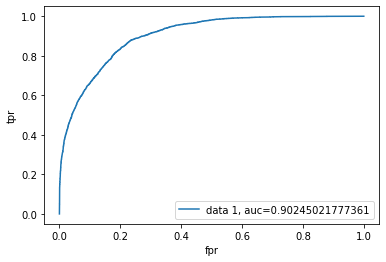

In [40]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

# Trying grid search to improve stats

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [32]:
clf = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [33]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/home/adarsh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

In [34]:
best_clf.best_estimator_

LogisticRegression(C=0.012742749857031334, penalty='l1', random_state=16,
                   solver='liblinear')

In [35]:
y_pred_best = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = (2 * precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8247650635710337
Precision: 0.7259801809564843
Recall: 0.4318298308559713
F1: 0.5415394504258396


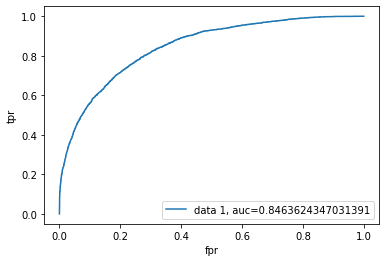

In [36]:
y_pred_proba = best_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()